<a href="https://colab.research.google.com/github/kleeresearch/TextAnalysis/blob/master/Course/Day2/8_Copy_of_En_text_network_analysis_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
!pwd

/content/drive/My Drive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day2/python_code


In [19]:
!ls

alice_mask.png		     En_text_network_analysis_example.ipynb  naver_news.txt
alice_wc.png		     example_Kr				     network_analysis_basics.ipynb
bottle_mask.jpeg	     Korean_news.txt			     nytimes.png
bottle_wc.png		     Kr_frequency_analysis.ipynb	     nytimes.txt
circle.png		     Kr_na.py				     __pycache__
En_frequency_analysis.ipynb  Kr_network_analysis_docs.ipynb	     twitter_mask.png
En_na.py		     Kr_text_network_analysis_example.ipynb  vector_example.ipynb
En_test.graphml		     malgun.ttf


In [20]:
%cd /content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day2/python_code

/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day2/python_code


In [21]:
#import En_na
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re

In [22]:
def do_En_preprocessing(text, customized_stopwords):
    cleaned_content = re.sub(r'[^\w\d\s]','',text) # To remove symbols
    cleaned_content = cleaned_content.lower() # Case conversion, upper -> lower
    word_tokens = nltk.word_tokenize(cleaned_content) # Tokenization
    tokens_pos = nltk.pos_tag(word_tokens) # POS tagging
    NN_words = []   # To select nouns
    for word, pos in tokens_pos:
        if 'NN' in pos:
            NN_words.append(word)

    wlem = nltk.WordNetLemmatizer()   # Lemmatization
    lemmatized_words = []
    for word in NN_words:
        lemmatized_words.append(wlem.lemmatize(word))
    # 불용어 제거
    stopwords_list = stopwords.words('english')
    unique_NN_words = set(lemmatized_words)
    final_NN_words = lemmatized_words.copy()
    for word in unique_NN_words:
        if word in stopwords_list:
            while word in final_NN_words:
                final_NN_words.remove(word)

    unique_NN_words1 = set(final_NN_words)
    for word in unique_NN_words1:
        if word in customized_stopwords:
            while word in final_NN_words:
                final_NN_words.remove(word)

    return final_NN_words

In [23]:
# Counter 클래스의 결과물로부터 단어들만을 추출합니다.
def get_words(counter_results):
    words = []
    for word, fre in counter_results:
        words.append(word)
    return words

In [24]:
# 텍스트 데이터를 읽어 옵니다.
with open('/content/drive/MyDrive/KOSSDA_텍스트마이닝_강의자료/강의자료/Day1/python_code/nytimes.txt', 'r', encoding='utf8') as f:
    content = f.read()

In [25]:
# 사용자 불용어 사전의 예
customized_stopwords = ['be', 'today', 'yesterday', 'new', 'york', 'time']

In [26]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
NN_words = do_En_preprocessing(content, customized_stopwords)
c = Counter(NN_words)

In [28]:
# 빈도를 기준으어한 상위 10개 단어
c.most_common(10)

[('health', 11),
 ('people', 11),
 ('researcher', 7),
 ('study', 6),
 ('tie', 6),
 ('interaction', 5),
 ('friend', 4),
 ('others', 4),
 ('exercise', 4),
 ('connection', 3)]

In [29]:
# get_words() 사용자 함수를 이용해 단어들만 추출
selected_words = get_words(c.most_common(10))

In [30]:
print(selected_words)

['health', 'people', 'researcher', 'study', 'tie', 'interaction', 'friend', 'others', 'exercise', 'connection']


문장을 기준으로 타이 정보를 추가한 네트워크를 리턴한다.

신문기사에 대한 텍스트 분석 결과로 리턴한다.

do_na펑션은 문장 contents를 입력 받아 서로 다른 두개의 단어가 같은 문장에서 몇번 사용했는지에 대해 추가한다. 단어들을 이용해서 하나의 네트워크를 생성한다.

- raw한 형태의 데이터를 문장 단위로 쪼갠다.
- 타이 정보가 하나의 문장이 기준이 되어야 한다. 문장 단위로 쪼갠 다음에 10개의 단어 중에서 서로 다른 단어가 같은 문장에서 몇번 사용되었는지 파악하게 된다. 파일을 추가하고 서로 다른 2개의 단어가 2개 문장에서 사용되었으면 이 이상에서 작동되게끔 한다.

matplotlib를 이용해서 네트워크 분석 시각화에 사용되지 않는다. 여러 불편한 점들이 있기 때문에 상대적으로 용이한 getphi를 이용한다.
- 일단 저장해야 한다. graph ml 형태로 저장해야 한다.
gephi에서 불러온다. 파일을 오픈하고 그래프 ml 파일을 설정해서 오픈하면 된다.


In [32]:
import En_na

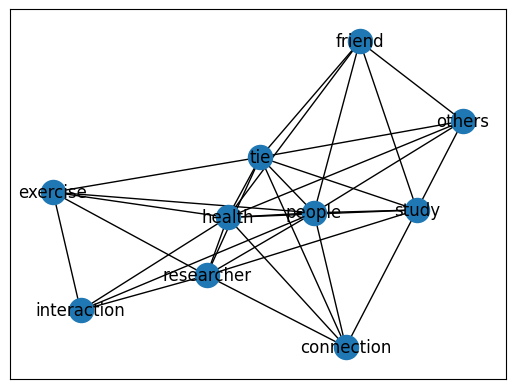

In [33]:
g = En_na.do_na(content, selected_words)
nx.write_graphml(g, 'En_test.graphml')
nx.draw_networkx(g)
plt.show()

In [34]:
g['health']

AtlasView({'interaction': {'weight': 3}, 'study': {'weight': 2}, 'friend': {'weight': 1}, 'tie': {'weight': 3}, 'others': {'weight': 1}, 'people': {'weight': 3}, 'researcher': {'weight': 4}, 'connection': {'weight': 1}, 'exercise': {'weight': 1}})

In [35]:
g['exercise']

AtlasView({'researcher': {'weight': 2}, 'tie': {'weight': 1}, 'people': {'weight': 1}, 'interaction': {'weight': 1}, 'health': {'weight': 1}})

## 중심도 계산하기

In [36]:
nx.degree_centrality(g)

{'health': 1.0,
 'people': 1.0,
 'researcher': 0.7777777777777777,
 'study': 0.7777777777777777,
 'tie': 0.8888888888888888,
 'interaction': 0.4444444444444444,
 'friend': 0.5555555555555556,
 'others': 0.5555555555555556,
 'exercise': 0.5555555555555556,
 'connection': 0.5555555555555556}

In [37]:
# 디그리 중심도
sorted(nx.degree_centrality(g).items(), key=lambda x:x[1],reverse=True)

[('health', 1.0),
 ('people', 1.0),
 ('tie', 0.8888888888888888),
 ('researcher', 0.7777777777777777),
 ('study', 0.7777777777777777),
 ('friend', 0.5555555555555556),
 ('others', 0.5555555555555556),
 ('exercise', 0.5555555555555556),
 ('connection', 0.5555555555555556),
 ('interaction', 0.4444444444444444)]

In [38]:
# 매개 중심도
sorted(nx.betweenness_centrality(g).items(), key=lambda x:x[1],reverse=True)

[('health', 0.11342592592592592),
 ('people', 0.11342592592592592),
 ('tie', 0.060185185185185175),
 ('researcher', 0.039351851851851846),
 ('study', 0.027777777777777776),
 ('exercise', 0.006944444444444444),
 ('interaction', 0.0),
 ('friend', 0.0),
 ('others', 0.0),
 ('connection', 0.0)]

In [39]:
# 근접 중심도
sorted(nx.closeness_centrality(g).items(), key=lambda x:x[1],reverse=True)

[('health', 1.0),
 ('people', 1.0),
 ('tie', 0.9),
 ('researcher', 0.8181818181818182),
 ('study', 0.8181818181818182),
 ('friend', 0.6923076923076923),
 ('others', 0.6923076923076923),
 ('exercise', 0.6923076923076923),
 ('connection', 0.6923076923076923),
 ('interaction', 0.6428571428571429)]